# POSTTEST 8 KB C1_20
## LIDYA SIMANUNGKALIT 
## 2009106125
## INFORMATIKA C 2020

In [1]:
#import library
import os
import tensorflow as tf
import tensorflow.keras.datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers,optimizers,datasets
import matplotlib.pyplot as plt
import numpy as np


# Load data

In [2]:
cifar10 = keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
# cek jumlah data train dan test
print(f'panjang x train: {len(X_train)}',
      f'panjang y train: {len(y_train)}',
      f'panjang x test: {len(X_test)}',
      f'panjang y test: {len(y_test)}',
      sep='\n')


panjang x train: 50000
panjang y train: 50000
panjang x test: 10000
panjang y test: 10000


# encodeing label

In [4]:
# Encode label
num_class = len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train, num_class)
y_test = tf.keras.utils.to_categorical(y_test, num_class)

In [5]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
# Cek dimensi data train
X_train.shape

(50000, 32, 32, 3)

# Menampilkan dataset

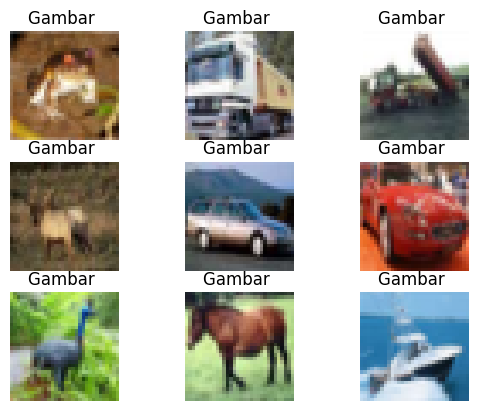

In [46]:
plt.figure
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i],cmap='gray')
  plt.axis('off')
  plt.title("Gambar ")

plt.show()

# reshape gambar

In [8]:
# Ubah dimensi array image menjadi 1D
x_train = tf.reshape(X_train, [50000, 3072])
x_test = tf.reshape(X_test, [10000, 3072])

# normalisasi

In [9]:
# Menormalkan nilai piksel gambar
x_train = tf.cast(x_train, tf.float32) / 255
x_test = tf.cast(x_test, tf.float32) / 255

In [10]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

# BUAT MODEL

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=3072),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='gelu'),
    tf.keras.layers.Dense(256, activation='swish'),
    tf.keras.layers.Dense(256, activation='hard_sigmoid'),
    tf.keras.layers.Dense(num_class, activation='softmax')
])

In [33]:
#  detail parameter layer
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               393344    
                                                                 
 dense_25 (Dense)            (None, 256)               33024     
                                                                 
 dense_26 (Dense)            (None, 256)               65792     
                                                                 
 dense_27 (Dense)            (None, 256)               65792     
                                                                 
 dense_28 (Dense)            (None, 256)               65792     
                                                                 
 dense_29 (Dense)            (None, 10)                2570      
                                                                 
Total params: 626,314
Trainable params: 626,314
Non-tr

# configurasi model

In [34]:

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

# training model

In [55]:
# Latih model


history = model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=128,
    verbose=1,
    validation_data=(x_test,y_test))


Epoch 1/30
391/391 [==============================] - 8s 20ms/step - loss: 0.8678 - accuracy: 0.6871 - val_loss: 1.6314 - val_accuracy: 0.4903
Epoch 2/30
391/391 [==============================] - 5s 12ms/step - loss: 0.8275 - accuracy: 0.7031 - val_loss: 1.6575 - val_accuracy: 0.4943
Epoch 3/30
391/391 [==============================] - 5s 12ms/step - loss: 0.7786 - accuracy: 0.7200 - val_loss: 1.6567 - val_accuracy: 0.4967
Epoch 4/30
391/391 [==============================] - 5s 12ms/step - loss: 0.7390 - accuracy: 0.7354 - val_loss: 1.7259 - val_accuracy: 0.4884
Epoch 5/30
391/391 [==============================] - 5s 12ms/step - loss: 0.7165 - accuracy: 0.7418 - val_loss: 1.7872 - val_accuracy: 0.4970
Epoch 6/30
391/391 [==============================] - 4s 11ms/step - loss: 0.6649 - accuracy: 0.7602 - val_loss: 1.8718 - val_accuracy: 0.4836
Epoch 7/30
391/391 [==============================] - 4s 11ms/step - loss: 0.6399 - accuracy: 0.7703 - val_loss: 1.8908 - val_accuracy: 0.4913

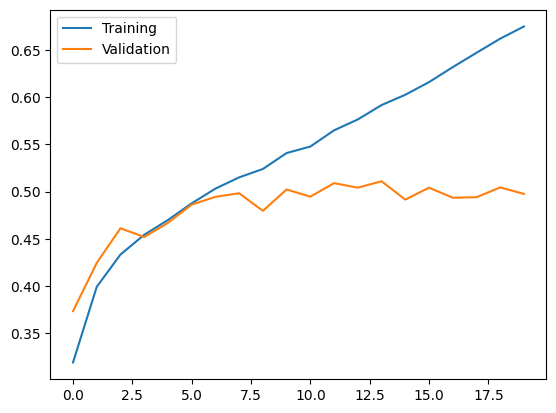

In [37]:
# Grafik learning rate
nilai_x = range(len(history.history['accuracy']))
plt.plot(nilai_x, history.history['accuracy'], label='Training')
plt.plot(nilai_x, history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

# evaluate model

In [56]:
score = model.evaluate(x_test,y_test,verbose=1)
print(f'Test Loss    : {score[0]}')
print(f'Test Akurasi : {round(score[1] * 100,2)} %')

313/313 [==============================] - 1s 3ms/step - loss: 3.0268 - accuracy: 0.4723
Test Loss    : 3.0267932415008545
Test Akurasi : 47.23 %
